**MODELO NO SUPERVISADO KMeans**

In [ ]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# List of URLs of the datasets
urls = [
    "https://www.football-data.co.uk/mmz4281/2425/E0.csv",
    "https://www.football-data.co.uk/mmz4281/2324/E0.csv",
    "https://www.football-data.co.uk/mmz4281/2223/E0.csv",
    "https://www.football-data.co.uk/mmz4281/2122/E0.csv",
    "https://www.football-data.co.uk/mmz4281/2021/E0.csv",
    "https://www.football-data.co.uk/mmz4281/1920/E0.csv"
]

# Cargar todos los CSVs
dfs = [pd.read_csv(url) for url in urls]

# Visualizar las primeras filas de cada dataset para inspeccionar la estructura
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print(df.head(), "\n")

DataFrame 1:
  Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  E0  16/08/2024  20:00  Man United       Fulham     1     0   H     0     0   
1  E0  17/08/2024  12:30     Ipswich    Liverpool     0     2   A     0     0   
2  E0  17/08/2024  15:00     Arsenal       Wolves     2     0   H     1     0   
3  E0  17/08/2024  15:00     Everton     Brighton     0     3   A     0     1   
4  E0  17/08/2024  15:00   Newcastle  Southampton     1     0   H     1     0   

   ... B365CAHH B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  AvgCAHH  AvgCAHA  \
0  ...     1.86     2.07   1.83   2.11     1.88     2.11     1.82     2.05   
1  ...     2.05     1.88   2.04   1.90     2.20     2.00     1.99     1.88   
2  ...     2.02     1.91   2.00   1.90     2.05     1.93     1.99     1.87   
3  ...     1.87     2.06   1.86   2.07     1.92     2.10     1.83     2.04   
4  ...     1.87     2.06   1.88   2.06     1.89     2.10     1.82     2.05   

   BFECAHH  BFECAHA  
0     1.9

In [ ]:
# Unir todos los DataFrames en uno solo
dataset = pd.concat(dfs, ignore_index=True)

# Verificar el tamaño del DataFrame combinado
print(dataset.shape)

(2020, 132)


In [ ]:
# Seleccionar columnas relevantes

#FTHG =Goles del Equipo Local al Final del Partido
#FTAG =Goles del Equipo Visitante al Final del Partido
#HS  =Disparos del Equipo Local
#AS=Disparos del Equipo Visitante
#HST =Disparos a puerta del Equipo Local
#AST=Disparos a puerta del Equipo Visitante
#HC=Córners del Equipo Local
#AC=Córners del Equipo Visitante
#HY=Tarjetas Amarillas al Equipo Local
#AY=Tarjetas Amarillas al Equipo Visitante
#HR=Tarjetas Rojas al Equipo Local
#AR =Tarjetas Rojas al Equipo Visitante
VARS = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
train = dataset[VARS]

# Rellenar valores nulos (si existen) con ceros
train = train.fillna(0)

train.head()

,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HY,AY,HR,AR
0,1,0,14,10,5,2,7,8,2,3,0,0
1,0,2,7,18,2,5,2,10,3,1,0,0
2,2,0,18,9,6,3,8,2,2,2,0,0
3,0,3,9,10,1,5,1,5,1,1,1,0
4,1,0,3,19,1,4,3,12,2,4,1,0


In [ ]:
# Escalar las características
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

In [ ]:
#MODELO KMEANS
modelo_kmeans = KMeans(n_clusters=3, random_state=42)
modelo_kmeans.fit(train_scaled)
dataset['cluster_kmeans'] = modelo_kmeans.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

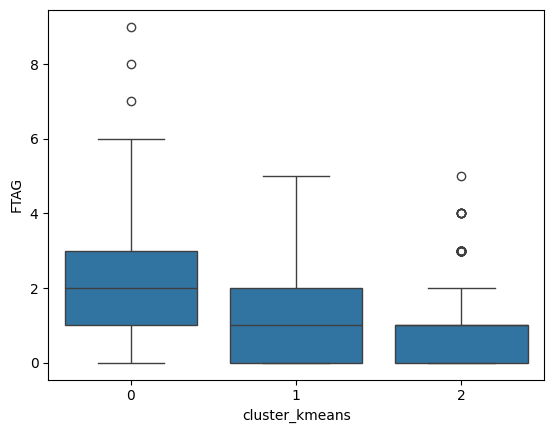

In [ ]:
#Analizando los clusters
sns.boxplot(data = dataset, x='cluster_kmeans', y='FTAG')
plt.show



In [ ]:
##saber que partidos hay en el cluster 1
dataset[dataset['cluster_kmeans'] == 1]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,VCH,VCD,VCA,IWCH,IWCD,IWCA,VCCH,VCCD,VCCA,cluster_kmeans
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,E0,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,E0,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,E0,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,E0,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,E0,26/07/2020,16:00,Burnley,Brighton,1,2,A,1,1,...,2.30,3.40,3.13,2.60,3.10,2.75,2.63,3.3,2.8,1
2012,E0,26/07/2020,16:00,Chelsea,Wolves,2,0,H,2,0,...,1.83,3.75,4.20,1.95,3.20,4.30,1.95,3.4,4.2,1
2013,E0,26/07/2020,16:00,Crystal Palace,Tottenham,1,1,D,0,1,...,6.50,4.10,1.53,7.00,4.50,1.47,7.00,4.5,1.5,1
2015,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,3.20,3.40,2.25,3.65,3.40,2.05,3.80,3.6,2.0,1


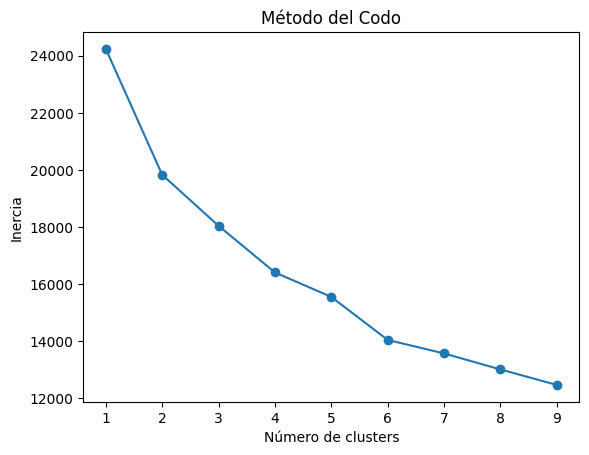

In [ ]:
#Para escoger el num de clusteres
##Metodo del codo
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [ ]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(train_scaled)

# Agregar los clusters al DataFrame original indicando a cuál grupo
dataset['Cluster'] = clusters

In [ ]:
# Calcular promedios de características por cluster
cluster_analysis = dataset.groupby('Cluster')[VARS].mean()
print(cluster_analysis)

# Basado en los promedios, mapeamos los clusters a categorías
cluster_to_result = {0: 'Lose', 1: 'Draw', 2: 'Win'}  # Ajusta según el análisis
dataset['Result'] = dataset['Cluster'].map(cluster_to_result)

#FTHG =Goles del Equipo Local al Final del Partido
#FTAG =Goles del Equipo Visitante al Final del Partido
#HS  =Disparos del Equipo Local
#AS=Disparos del Equipo Visitante
#HST =Disparos a puerta del Equipo Local
#AST=Disparos a puerta del Equipo Visitante
#HC=Córners del Equipo Local
#AC=Córners del Equipo Visitante
#HY=Tarjetas Amarillas al Equipo Local
#AY=Tarjetas Amarillas al Equipo Visitante
#HR=Tarjetas Rojas al Equipo Local
#AR =Tarjetas Rojas al Equipo Visitante


             FTHG      FTAG         HS         AS       HST       AST  \
Cluster                                                                 
0        1.119284  2.326044   9.854871  17.727634  3.489066  6.914513   
1        1.078714  1.034368  12.280488  10.651885  3.796009  3.411308   
2        2.626016  0.894309  19.559350   8.178862  7.489431  2.881301   

               HC        AC        HY        AY        HR        AR  
Cluster                                                              
0        3.886680  7.105368  1.739563  1.514911  0.166998  0.015905  
1        5.258315  4.495565  2.003326  2.062084  0.017738  0.043237  
2        7.978862  3.182114  1.214634  1.855285  0.021138  0.126829  


In [ ]:
# Mapear resultados reales a números
dataset['FTR_Numeric'] = dataset['FTR'].map({'H': 0, 'D': 1, 'A': 2})  # H=Win HOME, D=Draw, A=WIN AWAY

# Crear una tabla de contingencia
contingency_table = pd.crosstab(dataset['Cluster'], dataset['FTR_Numeric'])
print(contingency_table)


FTR_Numeric    0    1    2
Cluster                   
0             91   91  321
1            330  282  290
2            467   92   56


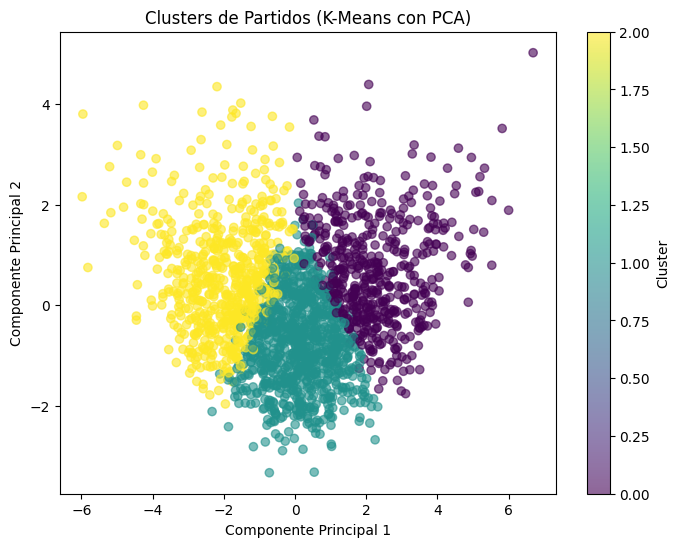

In [ ]:
# Reducir dimensiones a 2 con PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(train_scaled)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Clusters de Partidos (K-Means con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# # Filtrar equipos por cluster

for cluster in dataset['Cluster'].unique():
    print(f"\nEquipos en el Cluster {cluster}:")

    # Equipos en el cluster 'cluster'
    home_teams = dataset[dataset['Cluster'] == cluster]['HomeTeam'].unique()
    away_teams = dataset[dataset['Cluster'] == cluster]['AwayTeam'].unique()

    # Mostrar equipos de manera más ordenada
    print(f"\n  Equipos Locales ({len(home_teams)}):")
    for team in home_teams:
        print(f"    - {team}")

    print(f"\n  Equipos Visitantes ({len(away_teams)}):")
    for team in away_teams:
        print(f"    - {team}")



Equipos en el Cluster 1:

  Equipos Locales (27):
    - Man United
    - Nott'm Forest
    - West Ham
    - Brentford
    - Chelsea
    - Brighton
    - Crystal Palace
    - Aston Villa
    - Bournemouth
    - Ipswich
    - Leicester
    - Fulham
    - Liverpool
    - Tottenham
    - Newcastle
    - Everton
    - Arsenal
    - Southampton
    - Wolves
    - Man City
    - Luton
    - Burnley
    - Sheffield United
    - Leeds
    - Watford
    - Norwich
    - West Brom

  Equipos Visitantes (27):
    - Fulham
    - Bournemouth
    - Aston Villa
    - Crystal Palace
    - Man City
    - Man United
    - West Ham
    - Arsenal
    - Newcastle
    - Wolves
    - Liverpool
    - Ipswich
    - Nott'm Forest
    - Chelsea
    - Everton
    - Tottenham
    - Brighton
    - Southampton
    - Leicester
    - Sheffield United
    - Luton
    - Brentford
    - Burnley
    - Leeds
    - Watford
    - Norwich
    - West Brom

Equipos en el Cluster 0:

  Equipos Locales (27):
    - Ipswich
    - Ev

In [ ]:
# Ejemplo de equipos a comparar
local = "Tottenham"
visita = "Man City"


# Filtramos los partidos de cada equipo y obtenemos el cluster correspondiente
equipo_1_cluster = dataset[dataset['HomeTeam'] == local]['Cluster'].mode()[0]  # Usamos el modo para elegir el cluster más frecuente
equipo_2_cluster = dataset[dataset['AwayTeam'] == visita]['Cluster'].mode()[0]

# Obtener las estadísticas promedias de cada cluster
cluster_1_stats = cluster_analysis.loc[equipo_1_cluster]
cluster_2_stats = cluster_analysis.loc[equipo_2_cluster]

# Mostrar las estadísticas de cada equipo
print(f"Estadísticas promedio para {local} (Cluster {equipo_1_cluster}):")
print(cluster_1_stats)

print(f"\nEstadísticas promedio para {visita} (Cluster {equipo_2_cluster}):")
print(cluster_2_stats)

# Comparar: por ejemplo, comparamos los goles a favor (FTHG) y los tiros a puerta (HST)
if cluster_1_stats['FTHG'] > cluster_2_stats['FTHG']:
    print(f"\n{local} tiene más probabilidades de ganar (goles a favor).")
else:
    print(f"\n{visita} tiene más probabilidades de ganar (goles a favor).")

if cluster_1_stats['HST'] > cluster_2_stats['HST']:
    print(f"{local} también tiene más tiros a puerta.")
else:
    print(f"{visita} también tiene más tiros a puerta.")

Estadísticas promedio para Tottenham (Cluster 1):
FTHG     1.078714
FTAG     1.034368
HS      12.280488
AS      10.651885
HST      3.796009
AST      3.411308
HC       5.258315
AC       4.495565
HY       2.003326
AY       2.062084
HR       0.017738
AR       0.043237
Name: 1, dtype: float64

Estadísticas promedio para Man City (Cluster 0):
FTHG     1.119284
FTAG     2.326044
HS       9.854871
AS      17.727634
HST      3.489066
AST      6.914513
HC       3.886680
AC       7.105368
HY       1.739563
AY       1.514911
HR       0.166998
AR       0.015905
Name: 0, dtype: float64

Man City tiene más probabilidades de ganar (goles a favor).
Tottenham también tiene más tiros a puerta.
